In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

https://stackoverflow.com/questions/79093433/solving-non-linear-ode-system-with-boundary-conditions-in-python

In [2]:
def F(r):
    return 1.

def W(r):
    return 1.

In [3]:
def H(r, g=10.):
    return g * r * F(r)

def K(r, g=10.):
    return 1. - g * r * W(r)

In [49]:
def system(r, x, l=1.):
    return np.array([
        x[2],
        x[3],
        x[0] * (x[0] ** 2 - 1.) / r ** 2,
        (x[1] + 1.) / r ** 2
    ])

In [54]:
r = np.linspace(0.01, 100., 1000)
x = np.ones((4, r.size))

In [58]:
def boundary(ya, yb):
    return np.array([
        ya[0] - 1.,
        yb[0] - 1.,
        ya[-1],
        yb[-1],
    ])

In [59]:
sol = integrate.solve_bvp(system, boundary, r, x)
sol

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 1.000e-02  1.101e-01 ...  9.990e+01  1.000e+02]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x7ff14d9febb0>
             p: None
             y: [[ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                 [-1.000e+00 -1.000e+00 ... -1.000e+00 -1.000e+00]
                 [-3.486e-14 -2.220e-15 ... -4.441e-16 -6.661e-16]
                 [ 0.000e+00 -3.735e-08 ...  1.044e-14  0.000e+00]]
            yp: [[-3.486e-14 -2.220e-15 ... -4.441e-16 -6.661e-16]
                 [ 0.000e+00 -3.735e-08 ...  1.044e-14  0.000e+00]
                 [ 4.441e-12  3.664e-14 ...  0.000e+00  0.000e+00]
                 [ 3.252e-06  1.053e-07 ...  4.047e-14  4.038e-14]]
 rms_residuals: [ 1.254e-06  4.668e-07 ...  5.996e-13  1.589e-13]
         niter: 1

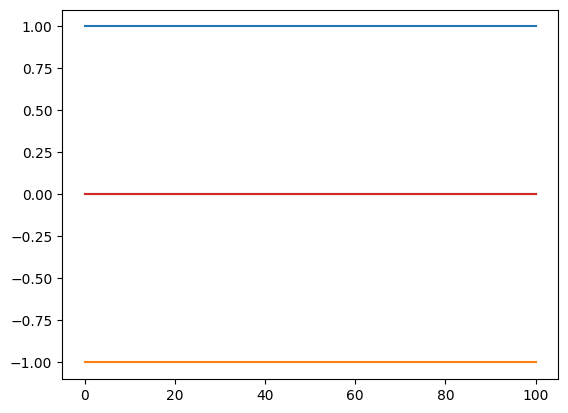

In [60]:
fig, axe = plt.subplots()
axe.plot(sol.x, sol.y.T)